# Compare Results

Here I compare results of CML and DL models, including runtime and performance metrics

## Import Packages

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import Data

In [39]:
path_to_data = '../data/results/'
files = ['CML_results.csv','cnn_results.csv','fcn_results.csv','unet_results.csv']

# load CML results
results = pd.read_csv(path_to_data+files[0])

# loop through DL files
for file in files[1:]:
    # check file exists in directory
    try:
        df_dl = pd.read_csv(path_to_data+file)
    except:
        print(f'{file} not found')
        continue
    # merge dataframes
    results = pd.concat([results,df_dl])

results.head()

,model,mean_r2,std_r2,mean_absolute_error,mean_squared_error,root_mean_squared_error,1 Run Time,K-Fold Time,Hyperparameter Time,best_params
0,LinearRegression,0.269172,0.155081,0.105245,0.019269,0.138814,0.037555,7.393572,NaN,NaN
1,RandomForestRegressor,0.256013,0.062276,0.110000,0.020508,0.143208,5.955610,5.326381,21.417977,NaN
2,HuberRegressor,0.331429,0.095918,0.110534,0.020068,0.141663,0.021428,0.066908,0.560758,NaN
0,CNN,0.222127,NaN,NaN,0.820048,NaN,1.304762,13.685527,73.453065,NaN
0,FCN,-0.036613,NaN,NaN,1.092817,NaN,1.947433,23.820650,24.969646,NaN


# Basic Plot showing preformance
(Note that this works before/after I've run DL models, and will adjust as I add more)


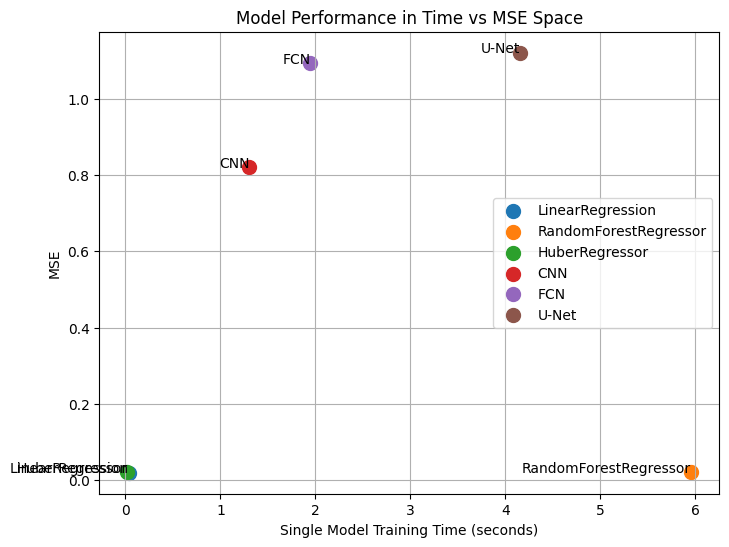

In [40]:
# Make a plot showing labeled points for each model in time/MSE space
plt.figure(figsize=(8, 6))

# Scatter plot for time vs MSE
for i, row in results.iterrows():
    plt.scatter(row['1 Run Time'], row['mean_squared_error'], label=row['model'], s=100)  # s controls the size of the points
    plt.text(row['1 Run Time'], row['mean_squared_error'], row['model'], fontsize=10, ha='right')  # Add labels near points

plt.xlabel("Single Model Training Time (seconds)")
plt.ylabel("MSE")
plt.title("Model Performance in Time vs MSE Space")
plt.grid(True)
plt.legend()
plt.show()

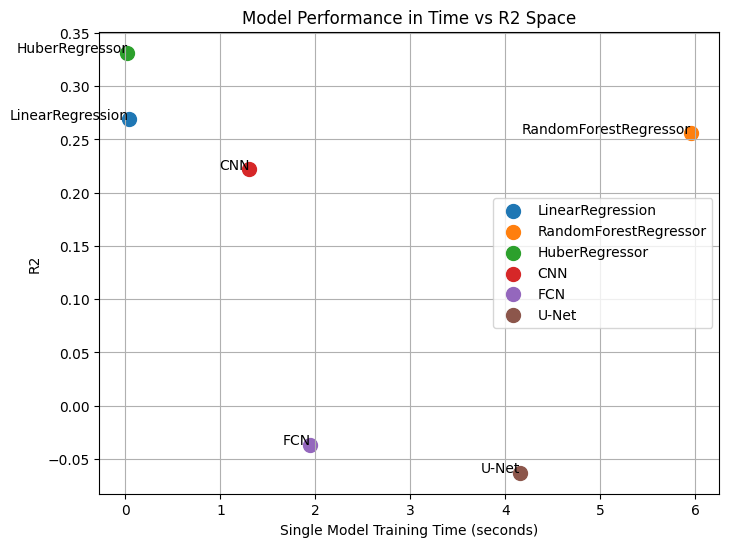

In [41]:
# Make a plot showing labeled points for each model in time/r2 space
plt.figure(figsize=(8, 6))

# Scatter plot for time vs MSE
for i, row in results.iterrows():
    plt.scatter(row['1 Run Time'], row['mean_r2'], label=row['model'], s=100)  # s controls the size of the points
    plt.text(row['1 Run Time'], row['mean_r2'], row['model'], fontsize=10, ha='right')  # Add labels near points

plt.xlabel("Single Model Training Time (seconds)")
plt.ylabel("R2")
plt.title("Model Performance in Time vs R2 Space")
plt.grid(True)
plt.legend()
plt.show()

## Explore Relative times

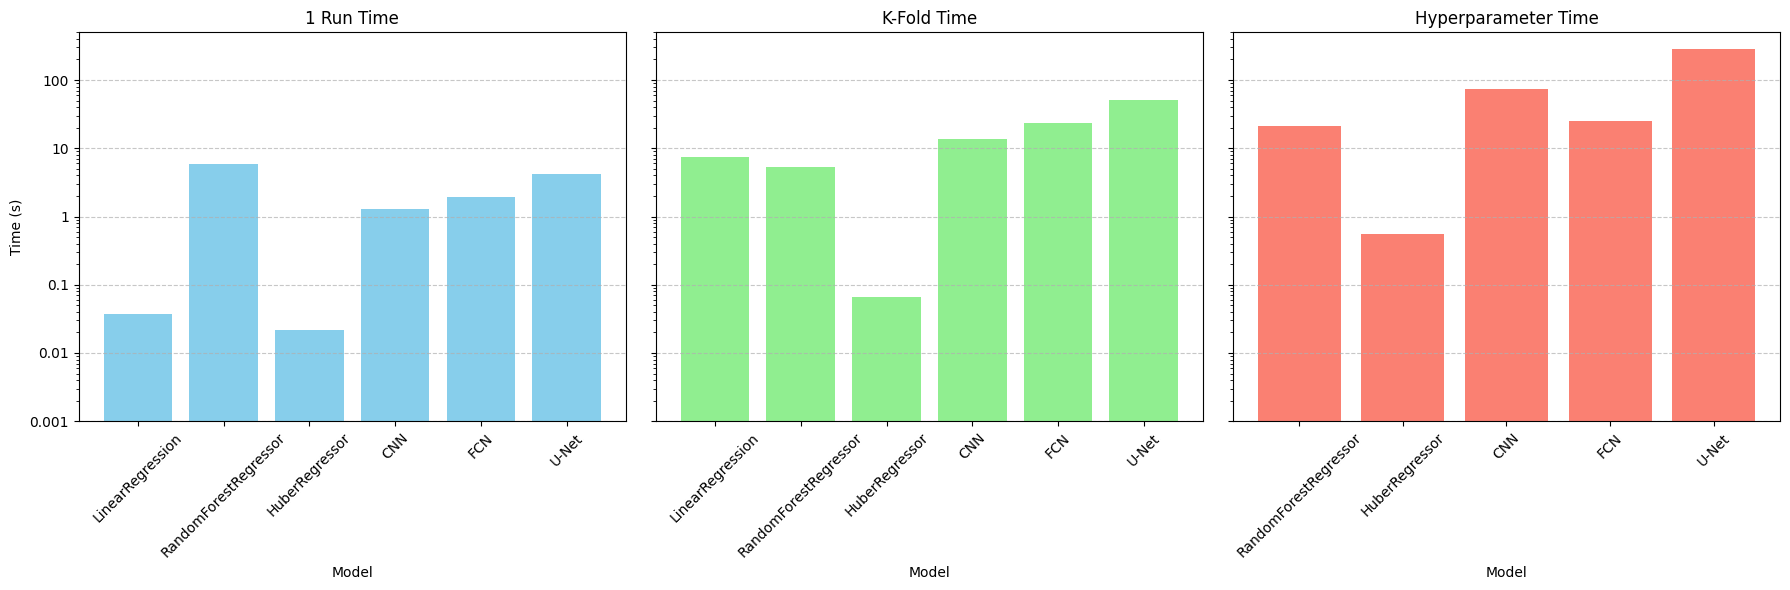

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot 1 Run Time
axes[0].bar(results['model'], results['1 Run Time'], color='skyblue')
axes[0].set_title('1 Run Time')
axes[0].set_ylabel('Time (s)')
axes[0].set_xlabel('Model')
axes[0].set_yscale('log')
axes[0].set_ylim(0.001, 500)
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:g}'))
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot K-Fold Time
axes[1].bar(results['model'], results['K-Fold Time'], color='lightgreen')
axes[1].set_title('K-Fold Time')
axes[1].set_xlabel('Model')
axes[1].set_yscale('log')
axes[1].set_ylim(0.001, 500)
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:g}'))
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot Hyperparameter Time
axes[2].bar(results['model'], results['Hyperparameter Time'], color='salmon')
axes[2].set_title('Hyperparameter Time')
axes[2].set_xlabel('Model')
axes[2].set_yscale('log')
axes[2].set_ylim(0.001, 500)
axes[2].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:g}'))
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()